In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = '/kaggle/input/used-cars-price/Cars Dataset.csv'
ucp_data = pd.read_csv(file_path)

In [3]:
ucp_data.columns.to_list()

['Model', 'Year', ' Km/h ', 'Color', 'Type', 'Fuel', 'Price']

In [4]:
ucp_data.head()

,Model,Year,Km/h,Color,Type,Fuel,Price
0,Hyundai Elantra HD,2009.0,"165,000",Gray,Automatic,Gasoline,"560,000"
1,Hyundai Elantra,2010.0,"194,000",Black,Automatic,Gasoline,"600,000"
2,Hyundai Elantra HD,2010.0,"205,000",Silver,Automatic,Gasoline,"575,000"
3,Hyundai Elantra,2010.0,"160,000",Black,Automatic,Gasoline,"550,000"
4,Hyundai Elantra,2009.0,"140,451",Eggplant,Automatic,Gasoline,"650,000"


In [5]:
ucp_data.tail()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Model,Year,Km/h,Color,Type,Fuel,Price
952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
953,NaN,NaN,NaN,NaN,NaN,NaN,NaN
954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
956,NaN,NaN,NaN,NaN,NaN,NaN,NaN



**A lot of Null data...**

**We need to remove the data to improve this model**


In [6]:
ucp_data.describe()

,Year
count,599.000000
mean,2048.323873
std,743.895065
min,2008.000000
25%,2014.000000
50%,2019.000000
75%,2022.000000
max,20224.000000


In [7]:
ucp_data.isnull().sum()

Model     358
Year      358
 Km/h     358
Color     358
Type      358
Fuel      358
Price     358
dtype: int64

In [8]:
ucp_data = ucp_data.dropna()
ucp_data.tail()

,Model,Year,Km/h,Color,Type,Fuel,Price
594,KIA Picanto,2015.0,"70,000",Silver,Automatic,Gasoline,"535,000"
595,Mitsubishi Lancer EX Shark,2015.0,"120,000",Black,Automatic,Gasoline,"660,000"
596,Ssang Yong Torres,2024.0,"4,000",White,Automatic,Gasoline,"1,900,000"
597,KIA Cerato,2011.0,"200,000",Red,Automatic,Gasoline,"665,000"
598,Hyundai Elantra HD,2020.0,"80,000",Bronze,Automatic,Gasoline,"700,000"


# **Data Visualization**

In [9]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

<ipython-input-9-3b18b9ececc6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Axes: xlabel='count', ylabel='Year'>

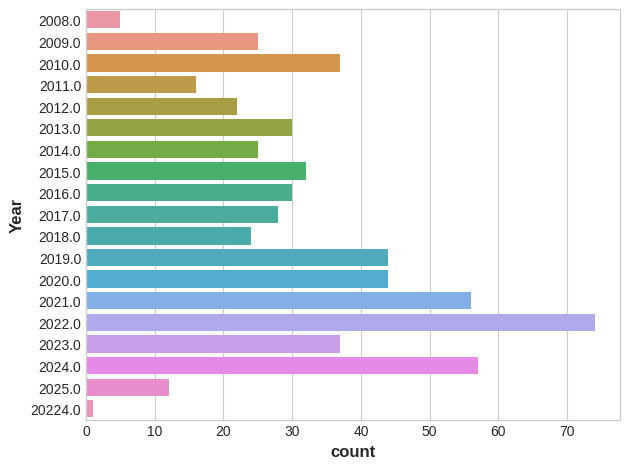

In [10]:
#year_sum = ucp_data.groupby("Year").Year.count()

sns.countplot(ucp_data, y="Year")

**The Year can't be over 2026**

In [11]:
ucp_data.drop(ucp_data[(ucp_data["Year"]>=2026)].index, inplace=True)

<Axes: xlabel='count', ylabel='Year'>

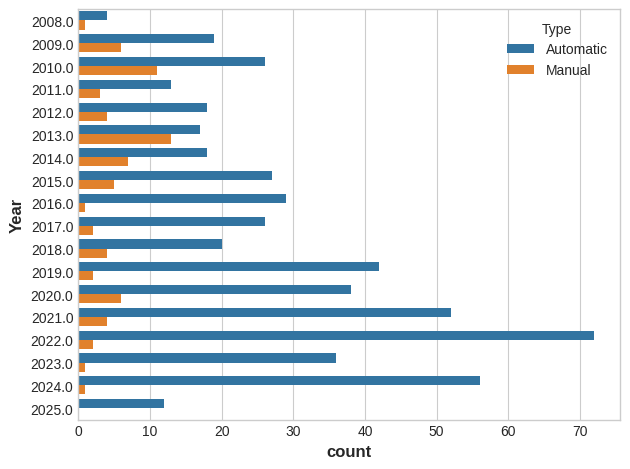

In [12]:
sns.countplot(ucp_data, y="Year", hue = "Type")

**Now, it's good**

<Axes: xlabel='count', ylabel='Color'>

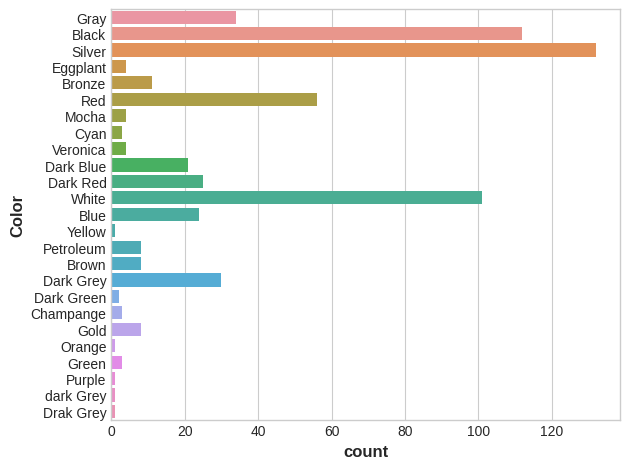

In [13]:
sns.countplot(ucp_data, y="Color")

<Axes: xlabel='Fuel', ylabel='count'>

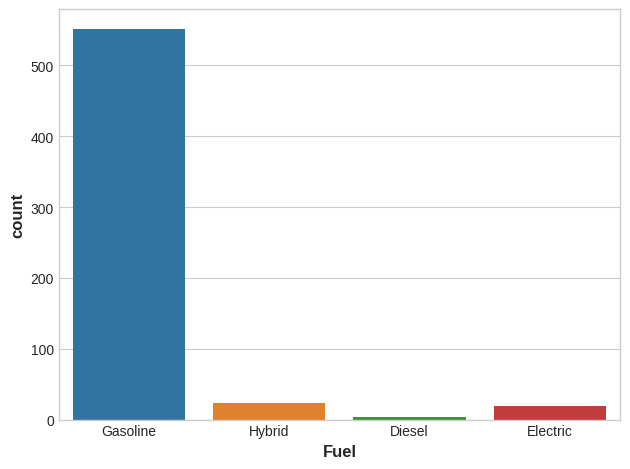

In [14]:
sns.countplot(ucp_data, x ="Fuel")

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Price'>

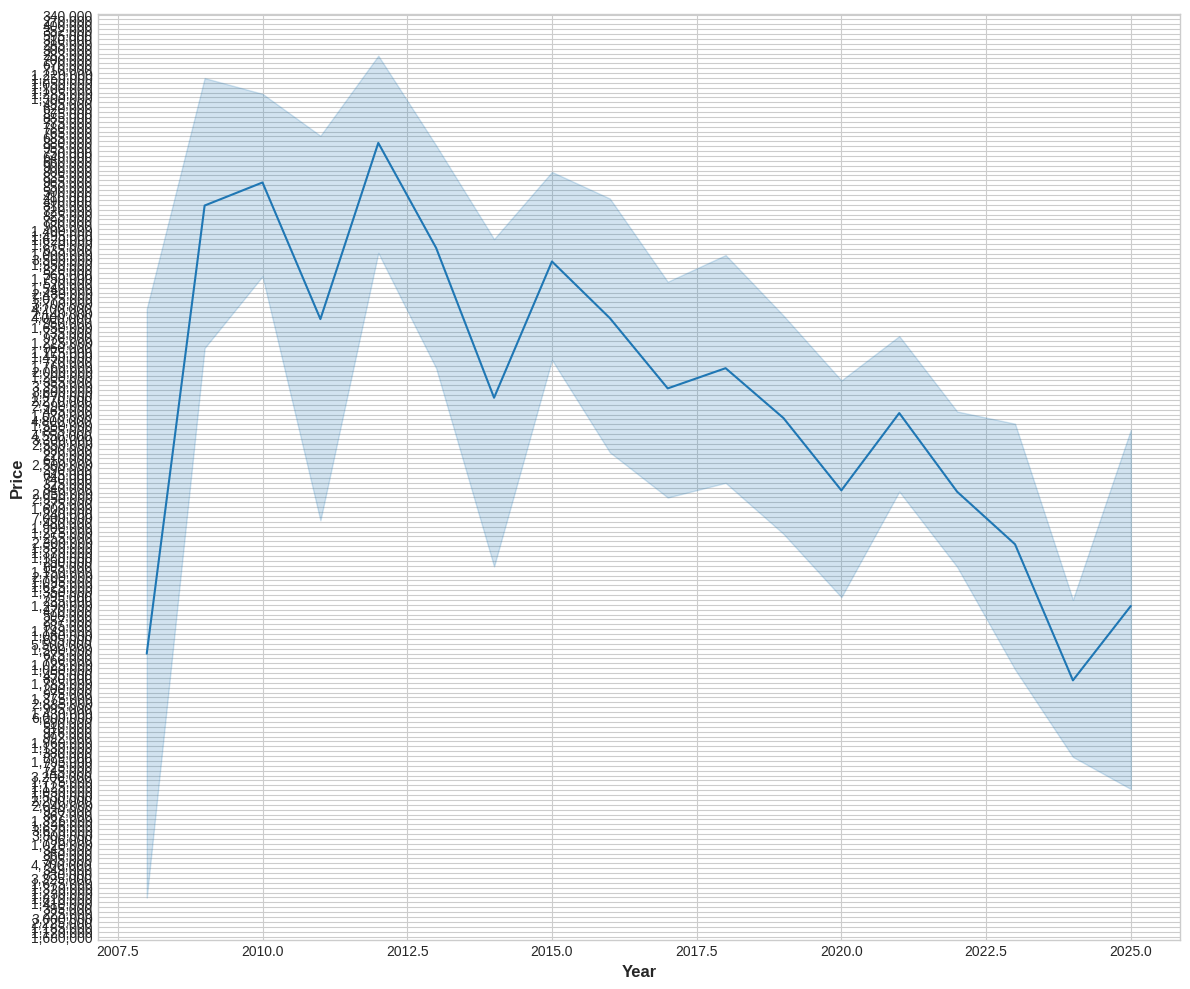

In [15]:
plt.figure(figsize=(12,10))
sns.lineplot(data=ucp_data, x = "Year", y = "Price")

In [16]:
ucp_data["Brand"] = ucp_data["Model"].str.split(" ", expand=True)[0]
ucp_data["Brand"].tail()

594           KIA
595    Mitsubishi
596         Ssang
597           KIA
598       Hyundai
Name: Brand, dtype: object

<Axes: xlabel='count', ylabel='Brand'>

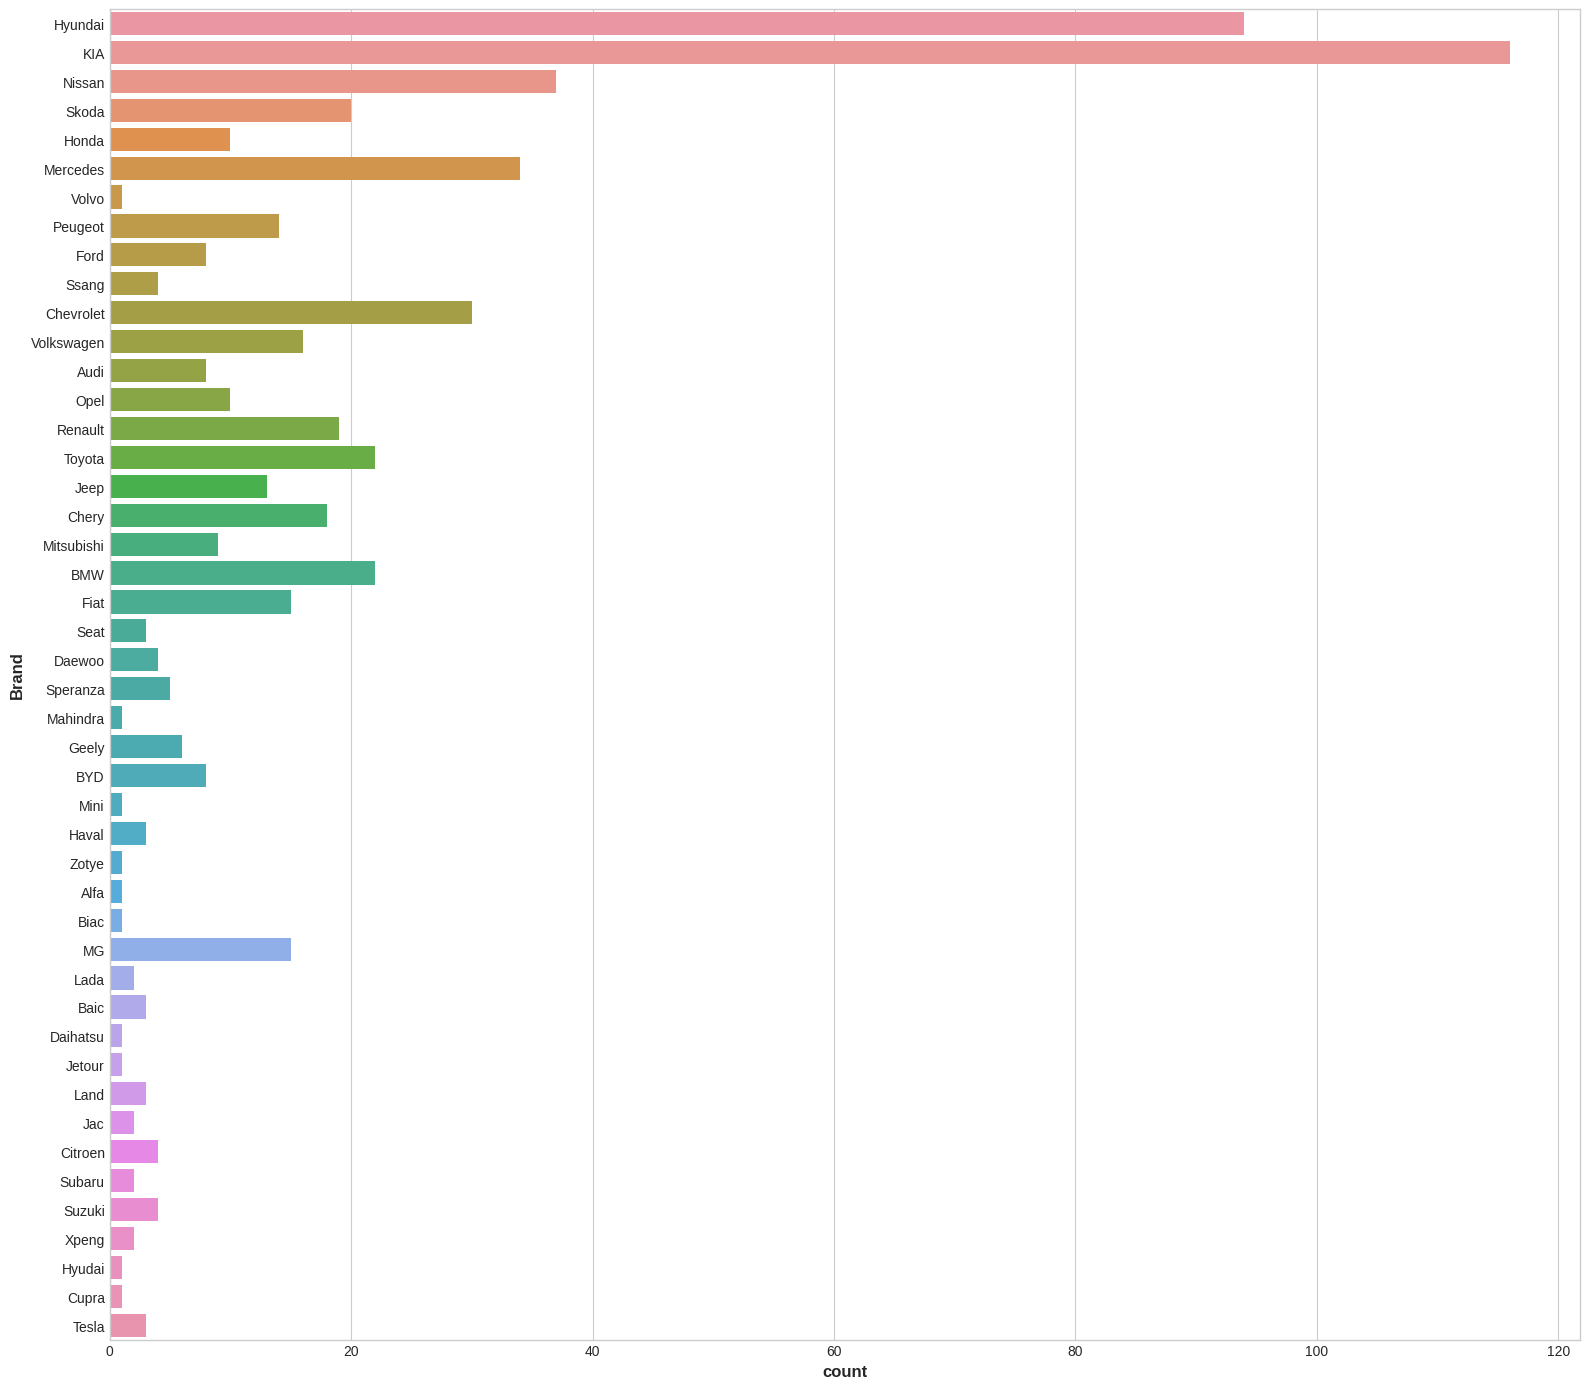

In [17]:
plt.figure(figsize=(16,14))
sns.countplot(ucp_data, y="Brand")

# **Data Featuring**

<Figure size 1200x1000 with 0 Axes>

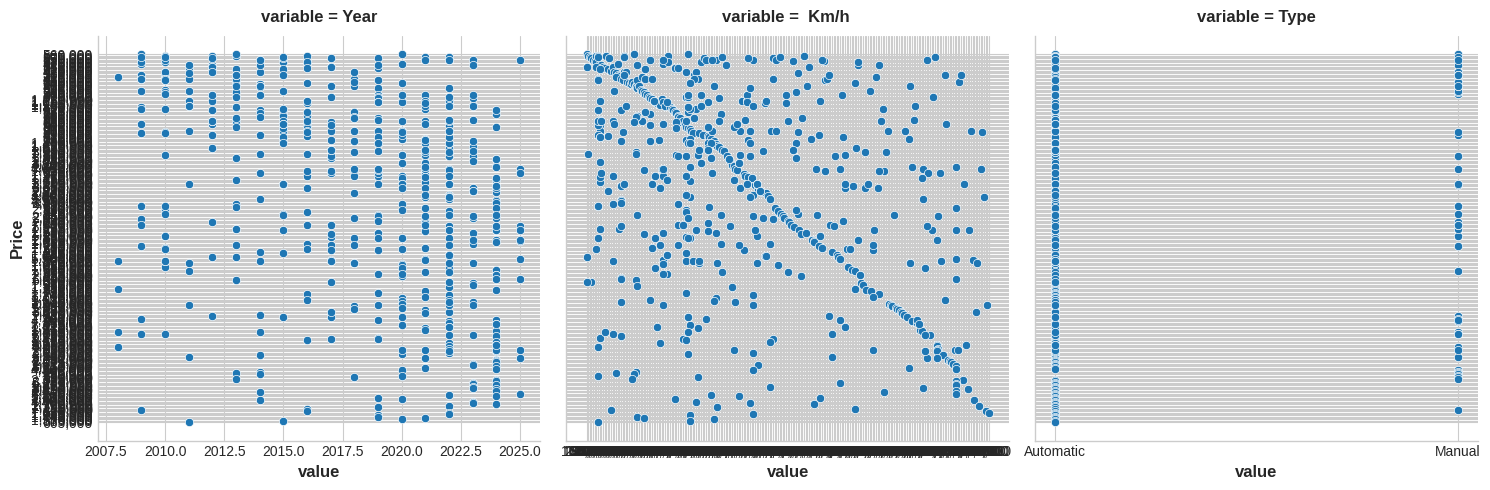

In [18]:
features = ["Year", " Km/h ", "Type"]
plt.figure(figsize=(12,10))
sns.relplot(
    x="value", y="Price", col="variable", data=ucp_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);

In [19]:
ucp_data[' Km/h '] = ucp_data[' Km/h '].str.replace(r'[^\d.]', '', regex=True).astype(float)
ucp_data['Price'] = ucp_data['Price'].str.replace(r'[^\d.]', '', regex=True).astype(float)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


columns_to_scale = [' Km/h ', 'Price']

# Apply the scaler and replace the original columns with standardized values
ucp_data[columns_to_scale] = scaler.fit_transform(ucp_data[columns_to_scale])

# Check the standardized values
ucp_data.head()

,Model,Year,Km/h,Color,Type,Fuel,Price,Brand
0,Hyundai Elantra HD,2009.0,0.702468,Gray,Automatic,Gasoline,-0.634868,Hyundai
1,Hyundai Elantra,2010.0,1.073037,Black,Automatic,Gasoline,-0.598040,Hyundai
2,Hyundai Elantra HD,2010.0,1.213598,Silver,Automatic,Gasoline,-0.621058,Hyundai
3,Hyundai Elantra,2010.0,0.638576,Black,Automatic,Gasoline,-0.644075,Hyundai
4,Hyundai Elantra,2009.0,0.388774,Eggplant,Automatic,Gasoline,-0.552005,Hyundai


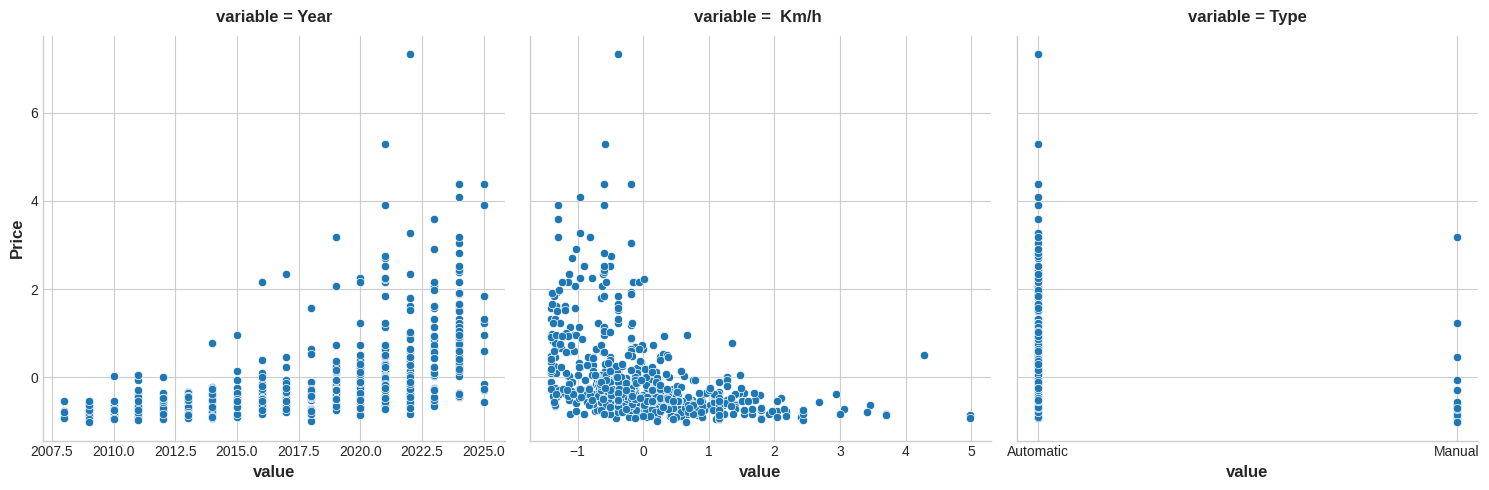

In [21]:
sns.relplot(
    x="value", y="Price", col="variable", data=ucp_data.melt(id_vars="Price", value_vars=features), facet_kws=dict(sharex=False),
);

<Axes: xlabel='Year', ylabel='Price'>

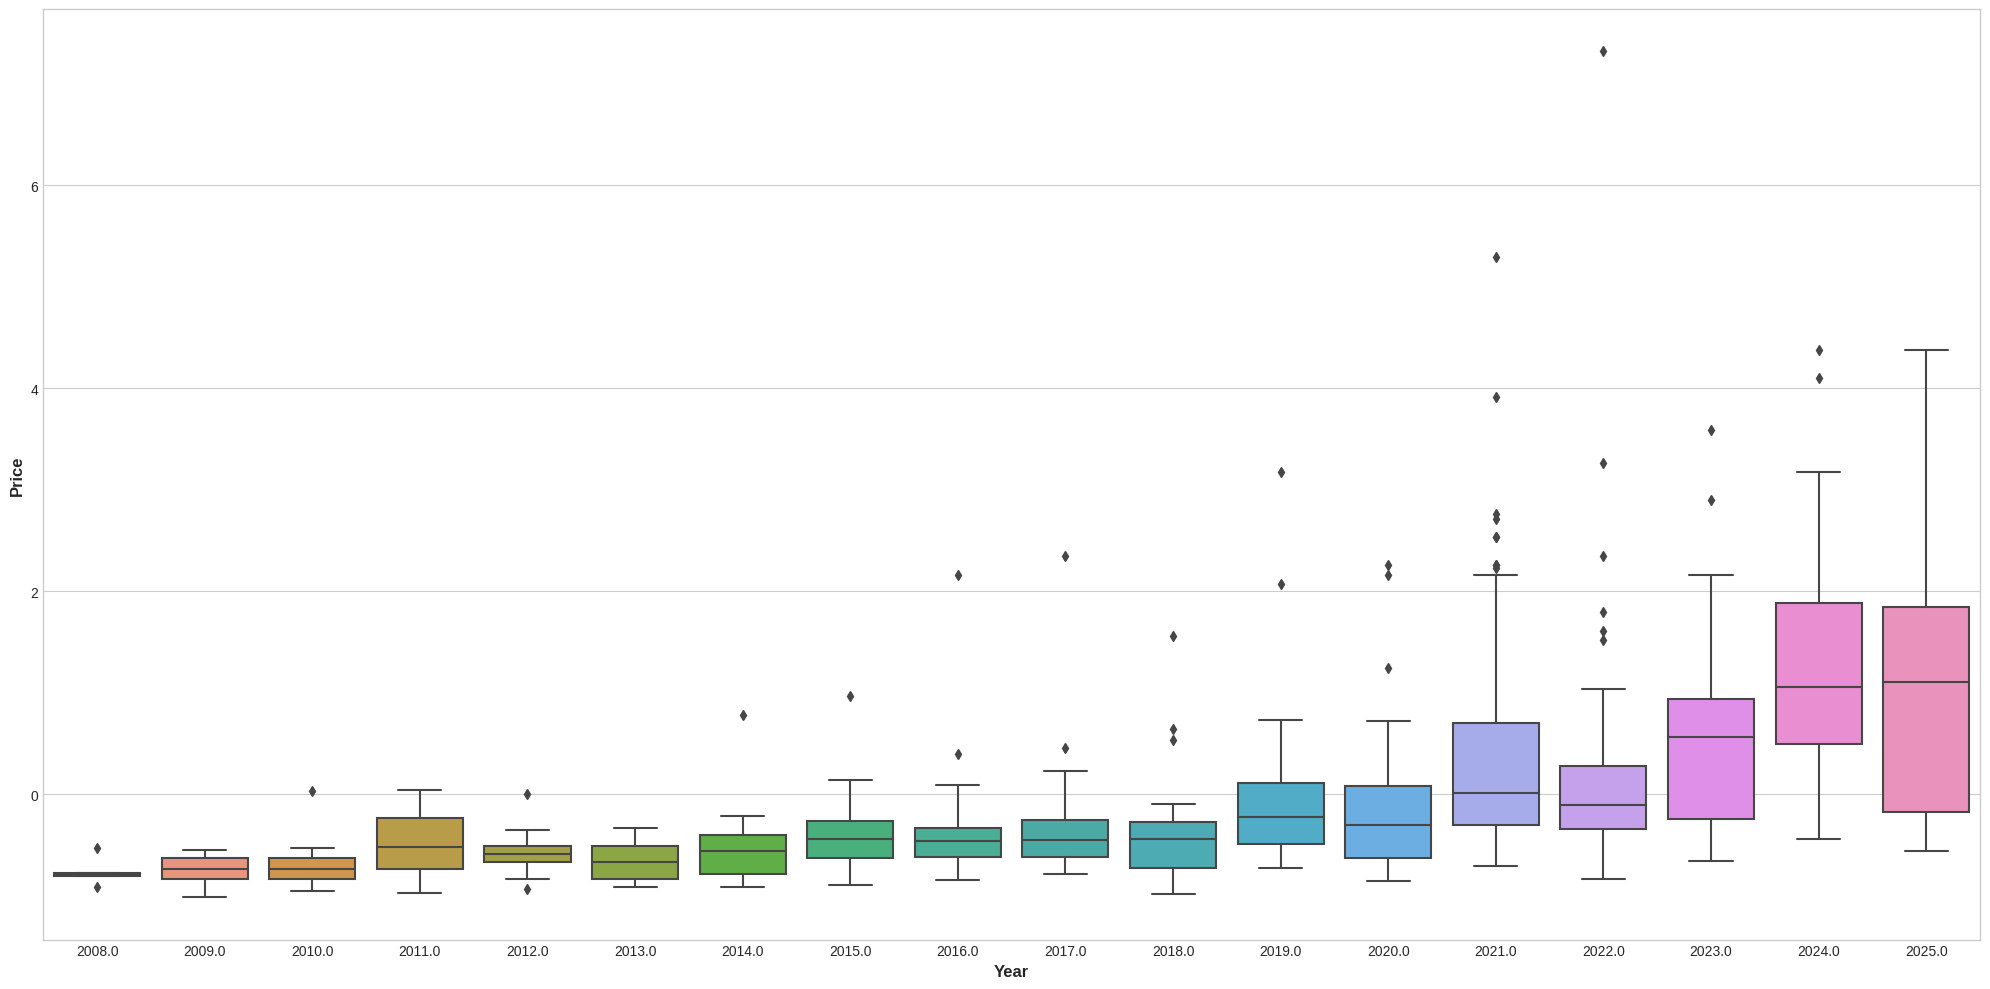

In [22]:
plt.figure(figsize=(20,10))
sns.boxplot(x = "Year", y = "Price", data=ucp_data)

<Axes: xlabel='Brand', ylabel='Price'>

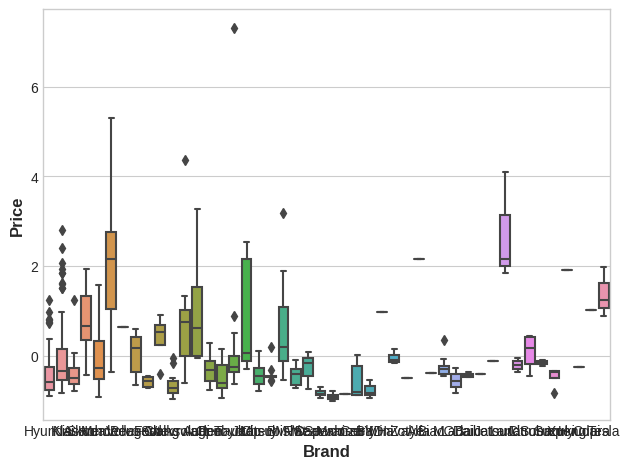

In [23]:
sns.boxplot(x = "Brand", y = "Price", data=ucp_data)

# **Training**

In [24]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [25]:
features = ['Year', ' Km/h ']
X = ucp_data[features]
y = ucp_data.Price

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=1)

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('MAE:', mean_absolute_error(y_val, predict))

MAE: 0.438437857826248


In [27]:
model = XGBRegressor(n_estimators=100, random_state = 0)
model.fit(X_train, y_train)
predict = model.predict(X_val)
print('MAE:', mean_absolute_error(y_val, predict))

MAE: 0.4666550103109103
